In [1]:
import numpy as np
from scipy.sparse import csr_matrix,csc_matrix,save_npz,load_npz,coo_matrix, vstack
import sys
from tqdm import tqdm
import h5py
import os
import matplotlib.pyplot as plt

# Test Datasets

In [2]:
HDDFolder = '/home/invites/jmorlot/HDD/'
data_path = HDDFolder + '/Datasets/ATAC_Hemato_Corces/ATAC_Hemato_Binary/'
f = h5py.File(data_path+'matrix_hemato.hdf5','r')
matrix = np.array(f[f.keys()[0]])
f.close()
namesCT = np.load(data_path+'names_CT2.npy')
labels = np.load(data_path+'labels_CT2.npy')

In [3]:
idx1 = np.where(matrix.sum(axis=0)>0)[0]
matrix = matrix[:,idx1]

In [4]:
idx = np.where(labels<13)[0]
matrix = matrix[idx]
labels = labels[idx]
namesCT=namesCT[np.unique(labels)]

In [5]:
idx = np.argsort(labels)
matrix = matrix[idx,:]
labels = labels[idx]

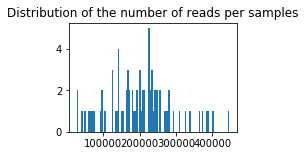

In [6]:
plt.figure(figsize=(3,2))
plt.hist(matrix.sum(axis=1),100)
plt.title('Distribution of the number of reads per samples')
#plt.savefig('histogram.png',dpi=300)
plt.show()

In [7]:
matrix.sum(axis=1).max()

446016.0

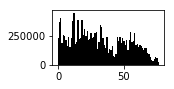

In [8]:
plt.figure(figsize=(2,1))
plt.bar(np.arange(matrix.shape[0]),matrix.sum(axis=1),1,color='k')
plt.savefig('plot_sum.png',dpi=300)
plt.show()

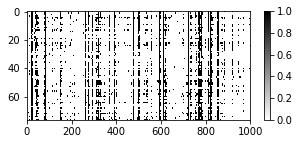

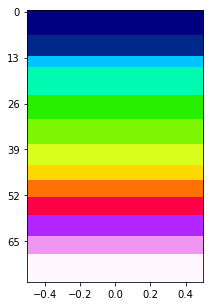

In [9]:
plt.figure(figsize=(5,2))
plt.imshow(matrix[idx,1100:2100],aspect='auto',cmap='gray_r')
plt.colorbar()
plt.savefig('ATAC_matrix_large.png',dpi=300)
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(labels[:,None],aspect=0.02,cmap='gist_ncar')
plt.yticks(np.arange(0,matrix.shape[0]+1,labels.max()+1))
plt.savefig('ATAC_colorbar.png',dpi=300)
plt.show()


# NGS Quality Tester

In [111]:
sys.path.append('../')
import QualityTester as QT
import QualityMesures as QM
reload(QT)
reload(QM)

<module 'QualityMesures' from '../QualityMesures.pyc'>

In [112]:
reload(QT)
qt2 = QT.QualityTester()
qt2.__dict__ = qt.__dict__ 
qt = QT.QualityTester()
qt.__dict__  = qt2.__dict__

In [78]:
qt = QT.QualityTester()

Remove outliers defined by anomalous number of reads


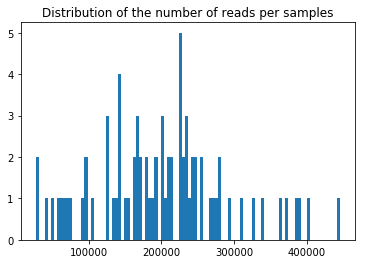

Lower threshold = 27361
Upper threshold = 403222
Number of removed samples = 2 / 77

Testing all distances:

None
	Chebyshev
		None
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
	Sokal Michener
		None
			Connectivity (Clustring,CF) index: ( 0.739367396594 , 0.803206752696 )
			Silhouette (Clustring,CF) index: ( 0.1768755487 , 0.671182314566 )
	Pearson
		None
			Connectivity (Clustring,CF) index: ( 0.791338199513 , 0.868654200625 )


  0%|          | 0/75 [00:00<?, ?it/s]

			Silhouette (Clustring,CF) index: ( 0.198855149887 , 0.661839154312 )
	Mutual Information


100%|██████████| 75/75 [02:02<00:00,  1.64s/it]


		None
			Connectivity (Clustring,CF) index: ( 0.805936739659 , 0.865845978839 )
			Silhouette (Clustring,CF) index: ( 0.0938229371861 , 0.577469515187 )
	Dice
		None
			Connectivity (Clustring,CF) index: ( 0.760583941606 , 0.839472309253 )
			Silhouette (Clustring,CF) index: ( 0.185495691175 , 0.659179467664 )
	Canberra
		None
			Connectivity (Clustring,CF) index: ( 0.739367396594 , 0.809309517193 )
			Silhouette (Clustring,CF) index: ( 0.186540595757 , 0.672102561454 )
	Jaccard
		None
			Connectivity (Clustring,CF) index: ( 0.760583941606 , 0.8317141577 )
			Silhouette (Clustring,CF) index: ( 0.147670440096 , 0.628184445361 )
	Squared Euclidean
		None
Input contains NaN, infinity or a value too large for dtype('float64').
Input contains NaN, infinity or a value too large for dtype('float64').
	Bray Curtis
		None
			Connectivity (Clustring,CF) index: ( 0.760583941606 , 0.847775009527 )
			Silhouette (Clustring,CF) index: ( 0.185495691175 , 0.659126439874 )
	Spearman
		None
			Connecti

100%|██████████| 10/10 [09:20<00:00, 56.07s/it]


	City Block
		None
			Connectivity (Clustring,CF) index: ( 0.745693430657 , 0.825531251663 )
			Silhouette (Clustring,CF) index: ( 0.370741865554 , 0.818549167256 )
	Cosine
		None
			Connectivity (Clustring,CF) index: ( 0.772846715328 , 0.84033534997 )
			Silhouette (Clustring,CF) index: ( 0.483373937417 , 0.900405628844 )
	Euclidean
		None
			Connectivity (Clustring,CF) index: ( 0.749197080292 , 0.843062571384 )
			Silhouette (Clustring,CF) index: ( 0.378438549459 , 0.825340203098 )
	L2
		None
			Connectivity (Clustring,CF) index: ( 0.749197080292 , 0.818383422471 )
			Silhouette (Clustring,CF) index: ( 0.378438549459 , 0.823437525858 )
	Bray Curtis
		None
			Connectivity (Clustring,CF) index: ( 0.757469586375 , 0.849210481327 )
			Silhouette (Clustring,CF) index: ( 0.405270656114 , 0.835363735374 )
	Canberra
		None
			Connectivity (Clustring,CF) index: ( 0.71600973236 , 0.844930884201 )
			Silhouette (Clustring,CF) index: ( 0.301740861953 , 0.77714362717 )
	Pearson
		None
			Connecti

  4%|▍         | 3/75 [00:00<00:02, 24.07it/s]

			Silhouette (Clustring,CF) index: ( 0.416242867869 , 0.832667762249 )
	Mutual Information


100%|██████████| 75/75 [00:01<00:00, 46.45it/s]


		None
			Connectivity (Clustring,CF) index: ( 0.547542579075 , 0.697807653282 )
			Silhouette (Clustring,CF) index: ( 0.140239222183 , 0.70350276292 )
	Chebyshev
		None
			Connectivity (Clustring,CF) index: ( 0.750170316302 , 0.829295651631 )
			Silhouette (Clustring,CF) index: ( 0.365705063544 , 0.828122554926 )
	Spearman
		None
			Connectivity (Clustring,CF) index: ( 0.782676399027 , 0.858381845243 )
			Silhouette (Clustring,CF) index: ( 0.497032499723 , 0.892966247832 )
Get optimal PCA-Distance-Kernel
Optimal (PCA,Distance,Kernel) = ('None', 'Yule', 'None')


In [79]:
qt.get_optimal_distance(matrix=matrix,labels=labels,
                        threshold = [0.01, 0.99])

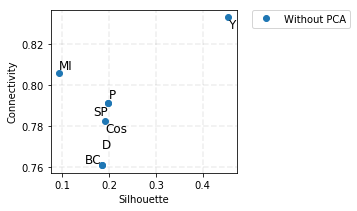

In [122]:
qt.displayNamesScatter(Suffix='_ATACBinary',ImgSize=3,numdisplay=7,dispNoPCA=True,dispPCA=False)

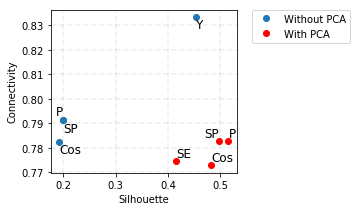

In [124]:
qt.displayNamesScatter(Suffix='_ATACBinary_PCA',ImgSize=3,numdisplay=8,dispNoPCA=True,dispPCA=True)

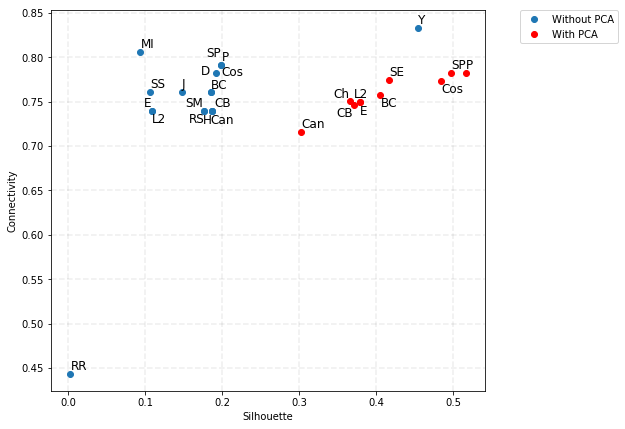

In [102]:
qt.displayNamesScatter(Suffix='_ATACBinary_PCA_all',ImgSize=7,numdisplay=-1,dispNoPCA=True,dispPCA=True)

In [88]:
qt.WriteDistanceScore(Suffix='_ATACBinary')

In [97]:
Ikey = 'Connectivity'
idx = np.argsort(qt.clust_index_filt_score[Ikey].values())[::-1]
keys = np.array(qt.clust_index_filt_score[Ikey].keys())[idx]
f = file('Filt_index_'+Ikey+'_ATACBinary.txt','w')
f.write('\t'.join(['Distance','Filtered Clustering Index','Number profiles removed at Zscore '+Ikey+' 1.65'])+'\n')
for key in keys:
    if key not in ['None-Chebyshev-None','PCA-Hamming-None']:
        print key,qt.clust_index_filt_score[Ikey][key],qt.clust_index_filt_threshold[Ikey][key]
        f.write('\t'.join([key,str(qt.clust_index_filt_score[Ikey][key]),str(qt.clust_index_filt_threshold[Ikey][key])])+'\n')
f.close()

None-Pearson-None 0.868654200625 13
None-Mutual Information-None 0.865845978839 10
None-Spearman-None 0.865701543658 9
None-Yule-None 0.86389770273 8
PCA-Squared Euclidean-None 0.859827941726 13
None-Cosine-None 0.858935965359 11
PCA-Spearman-None 0.858381845243 13
None-Sokal Sneath-None 0.855533296117 12
PCA-Bray Curtis-None 0.849210481327 13
None-Bray Curtis-None 0.847775009527 12
PCA-Canberra-None 0.844930884201 18
PCA-Euclidean-None 0.843062571384 14
PCA-Cosine-None 0.84033534997 14
None-Dice-None 0.839472309253 13
PCA-Pearson-None 0.831726807931 13
None-Jaccard-None 0.8317141577 11
PCA-Chebyshev-None 0.829295651631 15
PCA-City Block-None 0.825531251663 14
PCA-L2-None 0.818383422471 14
None-Rogers Tanimoto-None 0.816168432811 18
None-Euclidean-None 0.811579672018 15
None-Hamming-None 0.81080550701 18
None-Canberra-None 0.809309517193 18
None-L2-None 0.806892847623 15
None-City Block-None 0.803524169802 18
None-Sokal Michener-None 0.803206752696 21
PCA-Mutual Information-None 0.6978

Using Optimal (PCA,Distance,Kernel) = ('PCA', 'Pearson', 'None')


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 77
# Dataset Kept: 69 (89.6 %)
# Dataset Removed: 8 (10.4 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		6		3.06760327654		HSC
1		3		1.66894702013		MPP
2		3		2.58233692633		LMPP
3		8		4.66001529723		CMP
4		6		2.00898175552		GMP
5		7		5.17814263297		MEP
6		6		4.48720501978		Mono
7		4		4.83653716647		B
8		5		5.35862898587		CD4
9		3		3.27596496041		CD8
10		6		5.424860698		NK
11		5		7.23383500944		CLP
12		7		5.91326305212		Ery



learning rates: 100%|██████████| 3/3 [00:44<00:00, 14.86s/it]


Optimal (learning rate,perplexity) = (10,5)


learning rates: 100%|██████████| 3/3 [00:45<00:00, 15.27s/it]


Optimal (learning rate,perplexity) = (100,5)


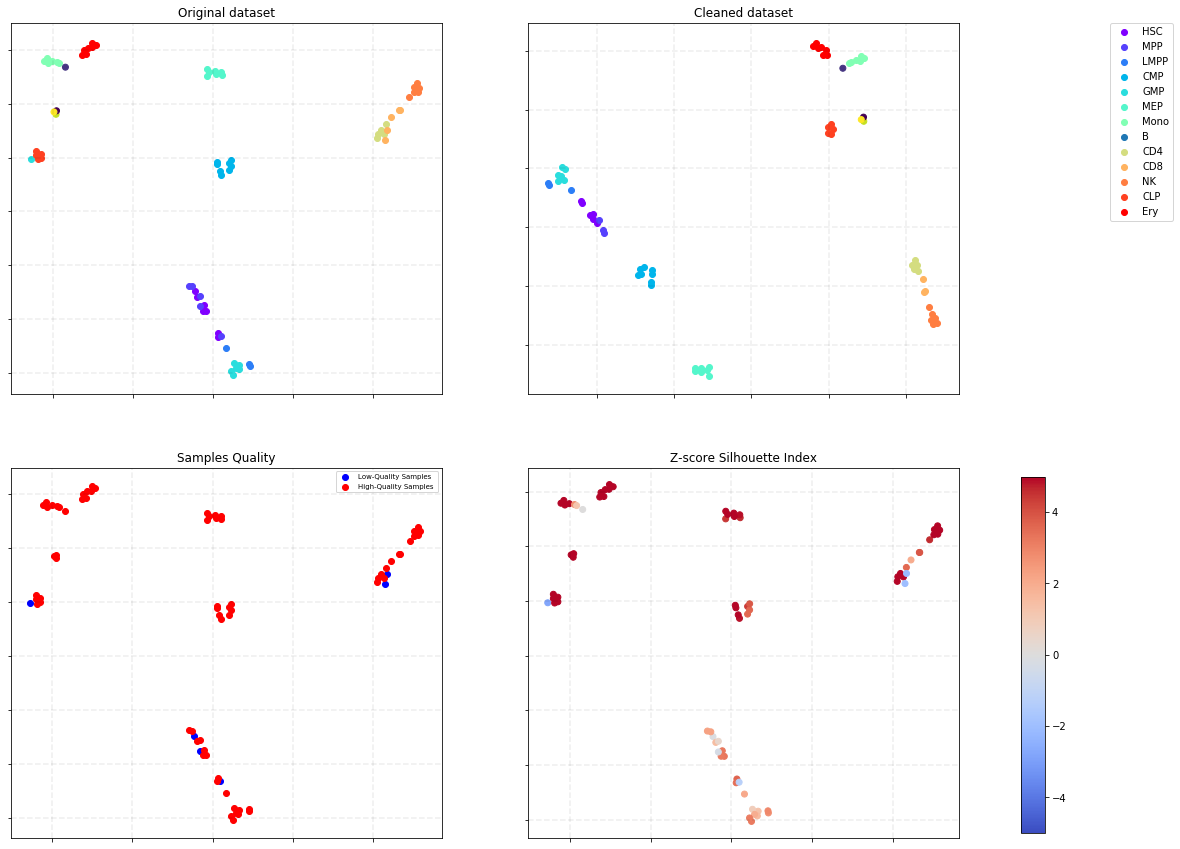

In [411]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT)
qt.display_samples_quality(Suffix='_ATACBinary_PCA-Pearson_TSNE_Tz0',DR='TSNE',names=namesCT)


# Dataset Total: 77
# Dataset Kept: 63 (81.8 %)
# Dataset Removed: 14 (18.2 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		6		3.4095250315		HSC
1		2		2.75529451124		MPP
2		2		2.86147057115		LMPP
3		8		4.75910115054		CMP
4		4		2.57271889273		GMP
5		7		5.01836758518		MEP
6		5		5.33917055646		Mono
7		3		7.50485512928		B
8		5		5.35453190868		CD4
9		3		2.54955472223		CD8
10		6		5.75474083913		NK
11		5		7.50562507023		CLP
12		7		5.83107052693		Ery


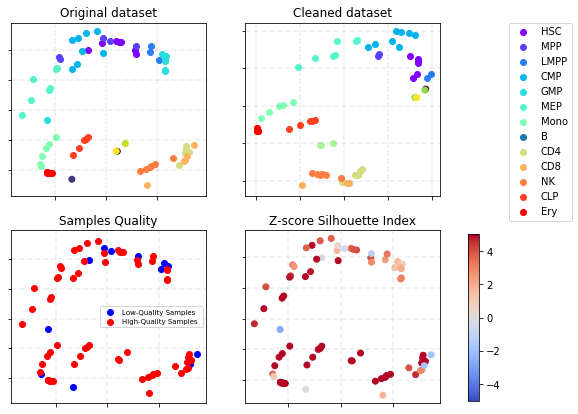

In [114]:
qt.compute_samples_quality(NR=100,Tz=1.65,return_Quality=False,names=namesCT,Distance='Pearson',PCA='PCA')
qt.display_samples_quality(Suffix='_ATACBinary_PCA-Pearson_MDS',DR='MDS',names=namesCT,Figsize=7)


# Dataset Total: 77
# Dataset Kept: 59 (76.6 %)
# Dataset Removed: 18 (23.4 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		4		1.98800089119		HSC
1		2		2.12424547382		MPP
3		8		2.82772006702		CMP
4		6		3.16398076881		GMP
5		6		3.67627436052		MEP
6		5		3.85601662789		Mono
7		3		4.45548970533		B
8		5		2.9251428386		CD4
9		2		1.83617632865		CD8
10		6		3.50240727019		NK
11		5		4.91773619486		CLP
12		7		4.63108740707		Ery

Removed Datasets
Labels		Name
2		LMPP


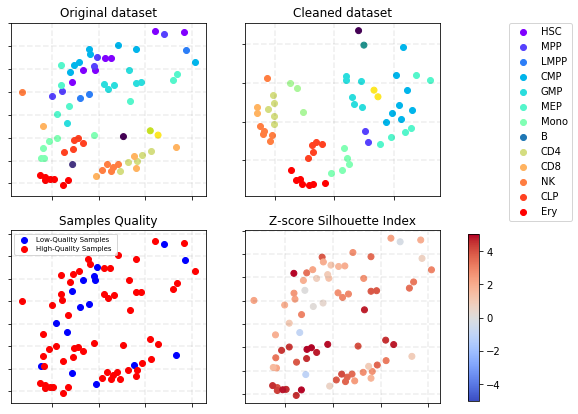

In [115]:
qt.compute_samples_quality(NR=100,Tz=1.65,return_Quality=False,names=namesCT,Distance='Euclidean')
qt.display_samples_quality(Suffix='_ATACBinary_N-Euclidean_MDS',DR='MDS',names=namesCT,Figsize=7)


# Dataset Total: 77
# Dataset Kept: 61 (79.2 %)
# Dataset Removed: 16 (20.8 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		5		2.31136856663		HSC
1		1		1.99382649971		MPP
3		8		2.89464842204		CMP
4		6		2.23875703165		GMP
5		7		2.78423478718		MEP
6		6		6.0199397071		Mono
7		3		4.37452071439		B
8		5		3.23620875487		CD4
9		2		2.08254397138		CD8
10		6		3.53382255461		NK
11		5		7.95512921353		CLP
12		7		6.31780888933		Ery

Removed Datasets
Labels		Name
2		LMPP


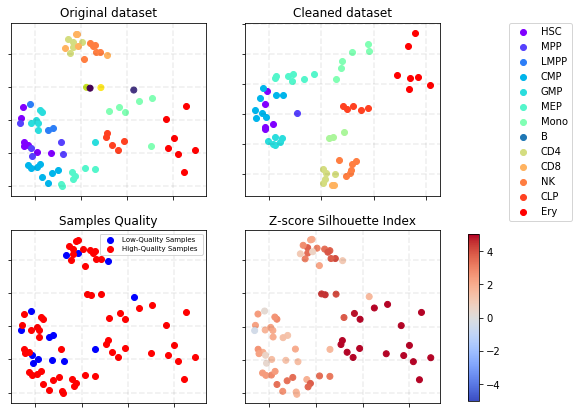

In [116]:
qt.compute_samples_quality(NR=100,Tz=1.65,return_Quality=False,names=namesCT,Distance='Jaccard')
qt.display_samples_quality(Suffix='_ATACBinary_N-Jaccard_MDS',DR='MDS',names=namesCT,Figsize=7)


# Dataset Total: 77
# Dataset Kept: 75 (97.4 %)
# Dataset Removed: 2 (2.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		1.96087197329		HSC
1		5		1.7013881918		MPP
2		3		4.89623578076		LMPP
3		8		2.83646878336		CMP
4		7		1.85916549287		GMP
5		7		4.55734669243		MEP
6		6		6.13013250366		Mono
7		4		4.98848607039		B
8		5		2.93288771665		CD4
9		5		2.36153572245		CD8
10		6		4.26381515299		NK
11		5		6.59339770024		CLP
12		7		5.26376702901		Ery


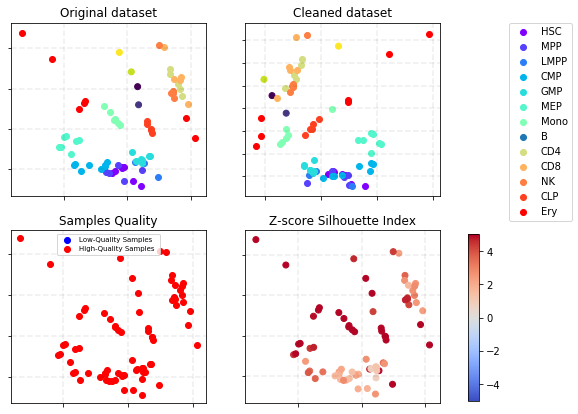

In [117]:
qt.compute_samples_quality(NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Yule')
qt.display_samples_quality(Suffix='_ATACBinary_None-Yule_MDS',DR='MDS',names=namesCT,Figsize=7)


# Dataset Total: 77
# Dataset Kept: 74 (96.1 %)
# Dataset Removed: 3 (3.9 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		1.93809289758		HSC
1		4		1.05000273779		MPP
2		3		2.02951999343		LMPP
3		8		3.29505646545		CMP
4		7		2.30184641641		GMP
5		7		3.72710662433		MEP
6		6		6.18121625009		Mono
7		4		4.87110513132		B
8		5		2.90490858793		CD4
9		5		1.66468484212		CD8
10		6		3.6290798427		NK
11		5		7.6105685933		CLP
12		7		6.42426725726		Ery


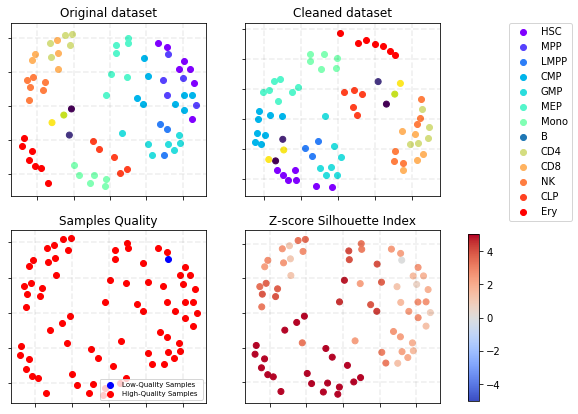

In [118]:
qt.compute_samples_quality(NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Mutual Information')
qt.display_samples_quality(Suffix='_ATACBinary_None-MI_MDS_Tz0',DR='MDS',names=namesCT,Figsize=7)


# Dataset Total: 77
# Dataset Kept: 66 (85.7 %)
# Dataset Removed: 11 (14.3 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.09009248564		HSC
1		4		0.923110854652		MPP
2		2		1.9112409445		LMPP
3		8		2.18400211652		CMP
4		7		1.47966439528		GMP
5		7		1.49208011806		MEP
6		5		1.11627583819		Mono
7		4		2.82136512932		B
8		5		1.82857485654		CD4
9		5		1.53652885234		CD8
10		6		1.92396623476		NK
11		5		1.42910806024		CLP
12		1		1.1277272733		Ery


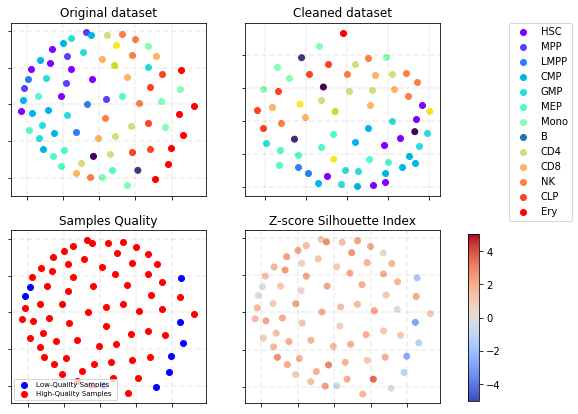

In [119]:
qt.compute_samples_quality(NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Russell Rao')
qt.display_samples_quality(Suffix='_ATACBinary_None-RR_MDS_Tz0',DR='MDS',names=namesCT,Figsize=7)

In [438]:
idx = np.argsort(qt.clust_index_filt_score['Silhouette'].values())[::-1]
keys = np.array(qt.clust_index_filt_score['Silhouette'].keys())[idx]

for key in keys:
    print key,qt.clust_index_filt_score['Silhouette'][key]

PCA-Cosine-None 0.900512487365
PCA-Pearson-None 0.896303453629
PCA-Spearman-None 0.8953792498
PCA-Bray Curtis-None 0.842653177627
PCA-Squared Euclidean-None 0.832491593279
PCA-L2-None 0.826573873077
None-Yule-None 0.822188696185
PCA-Euclidean-None 0.818739062077
PCA-Chebyshev-None 0.81802147241
PCA-City Block-None 0.815693768904
PCA-Canberra-None 0.775830574656
None-City Block-None 0.679044606435
None-Canberra-None 0.674041484109
None-Hamming-None 0.670811782756
None-Rogers Tanimoto-None 0.667752997974
None-Sokal Michener-None 0.667550404568
None-Pearson-None 0.660065980964
None-Bray Curtis-None 0.658735139056
None-Spearman-None 0.658375742066
None-Dice-None 0.654647754238
None-Cosine-None 0.650890745564
None-Jaccard-None 0.628280001932
None-Euclidean-None 0.604318628151
None-L2-None 0.60423678871
None-Sokal Sneath-None 0.592080347344
None-Russell Rao-None 0.504191879416
None-Chebyshev-None 0.5
PCA-Hamming-None 0.5


Using Optimal (PCA,Distance,Kernel) = ('PCA', 'Spearman', 'None')

# Dataset Total: 77
# Dataset Kept: 67 (87.0 %)
# Dataset Removed: 10 (13.0 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.99498594846		HSC
1		3		1.58168125657		MPP
2		2		0.634147183483		LMPP
3		8		5.59482670039		CMP
4		6		2.84948604808		GMP
5		7		5.20007624932		MEP
6		6		6.41764771916		Mono
7		4		6.16283236647		B
8		5		6.2843972223		CD4
9		1		2.69217841906		CD8
10		6		6.52457657797		NK
11		5		5.78952003658		CLP
12		7		6.12041967124		Ery


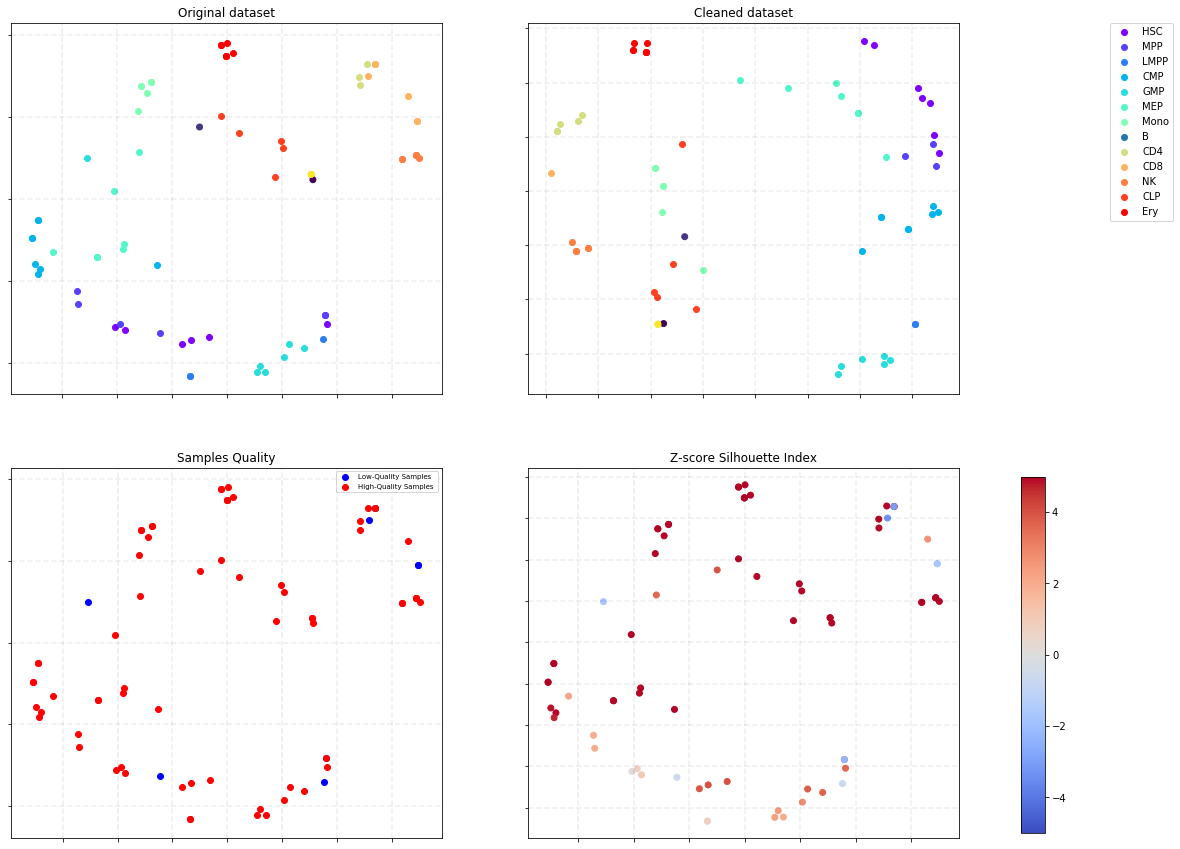

In [234]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT)
qt.display_samples_quality(Suffix='_ATACBinary_RMBAD_PCA-Spearman_MDS_Tz0',DR='MDS',names=namesCT)

Using Optimal (PCA,Distance,Kernel) = ('PCA', 'Pearson', 'None')

# Dataset Total: 77
# Dataset Kept: 75 (97.4 %)
# Dataset Removed: 2 (2.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.49314273036		Cluster 0
1		5		1.63682839797		Cluster 1
2		3		3.95474370578		Cluster 2
3		8		3.01990861097		Cluster 3
4		7		2.08108674026		Cluster 4
5		7		4.01493703655		Cluster 5
6		6		6.86776262658		Cluster 6
7		4		5.37795200987		Cluster 7
8		5		2.81073576897		Cluster 8
9		5		2.53694908778		Cluster 9
10		6		4.52011337217		Cluster 10
11		5		5.98913765956		Cluster 11
12		7		5.89519402503		Cluster 12


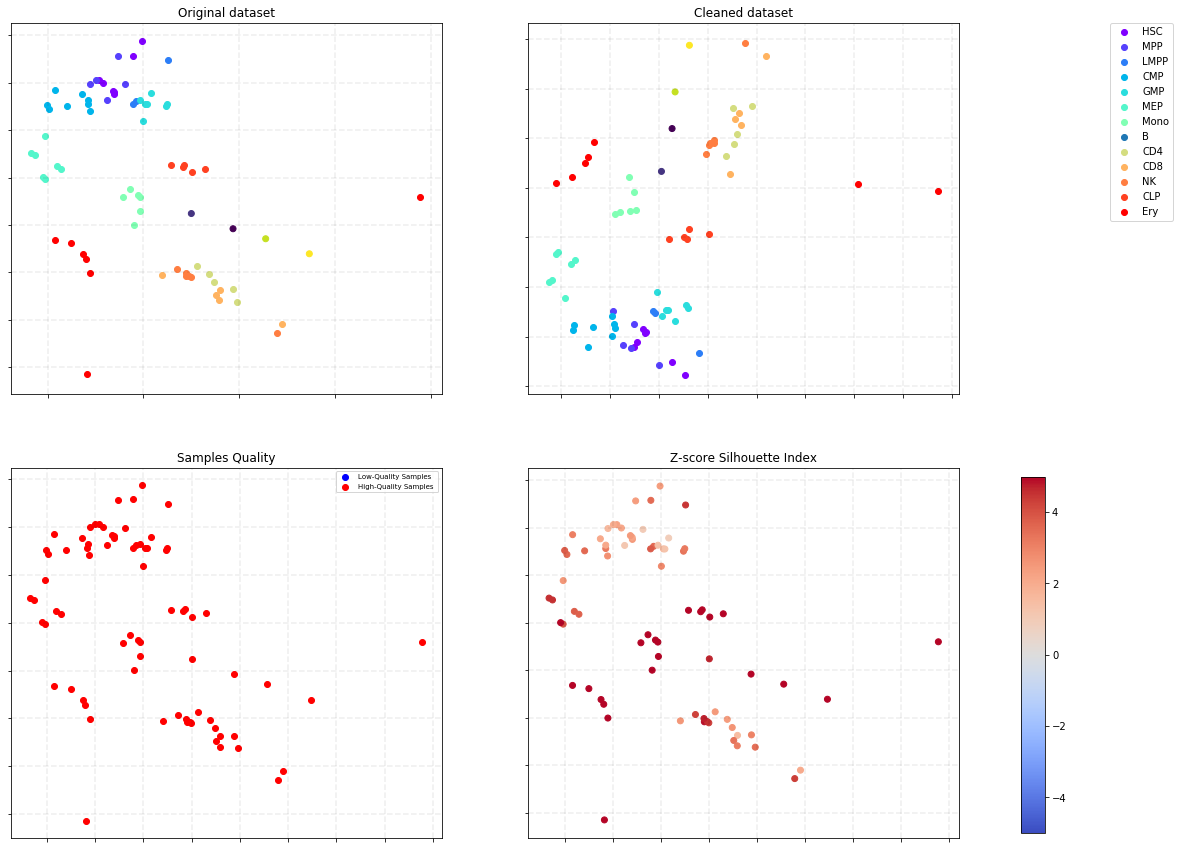

In [146]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False)#,Distance='Pearson',PCA='PCA')
qt.display_samples_quality(Suffix='_ATACBinary_RMBAD_PCA-Pearson_MDS',DR='MDS',names=namesCT)

Computing Distance matrix

# Dataset Total: 77
# Dataset Kept: 74 (96.1 %)
# Dataset Removed: 3 (3.9 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		1.90538646508		Cluster 0
1		4		0.991484314322		Cluster 1
2		3		1.14260808983		Cluster 2
3		8		2.916035959		Cluster 3
4		7		2.28151530265		Cluster 4
5		7		2.94903130371		Cluster 5
6		6		6.33311878406		Cluster 6
7		4		3.51032564817		Cluster 7
8		5		3.21594374016		Cluster 8
9		5		1.29383597846		Cluster 9
10		6		3.69646807297		Cluster 10
11		5		7.14791627692		Cluster 11
12		7		5.83166862813		Cluster 12


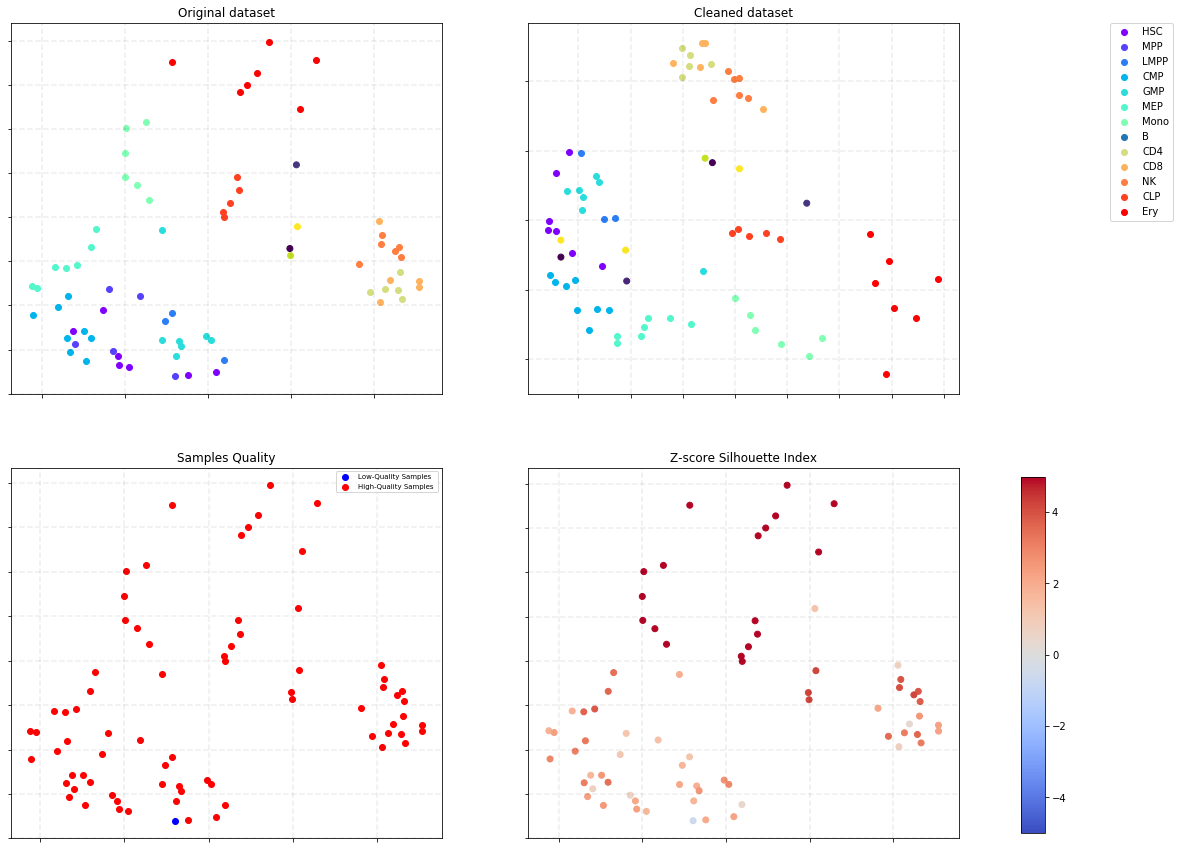

In [137]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,Distance='Jaccard')
qt.display_samples_quality(Suffix='_ATACBinary_RMBAD_Jaccard_MDS',DR='MDS',names=namesCT)

Computing Distance matrix

# Dataset Total: 77
# Dataset Kept: 72 (93.5 %)
# Dataset Removed: 5 (6.5 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		1.46756584888		Cluster 0
1		4		1.26298692052		Cluster 1
2		3		0.580199688555		Cluster 2
3		8		2.84243865959		Cluster 3
4		6		2.97169677132		Cluster 4
5		7		2.9009567947		Cluster 5
6		6		3.85120122516		Cluster 6
7		3		4.64712999539		Cluster 7
8		5		2.9805407823		Cluster 8
9		5		1.18628542151		Cluster 9
10		6		3.23503406535		Cluster 10
11		5		4.72770321034		Cluster 11
12		7		4.21513840997		Cluster 12


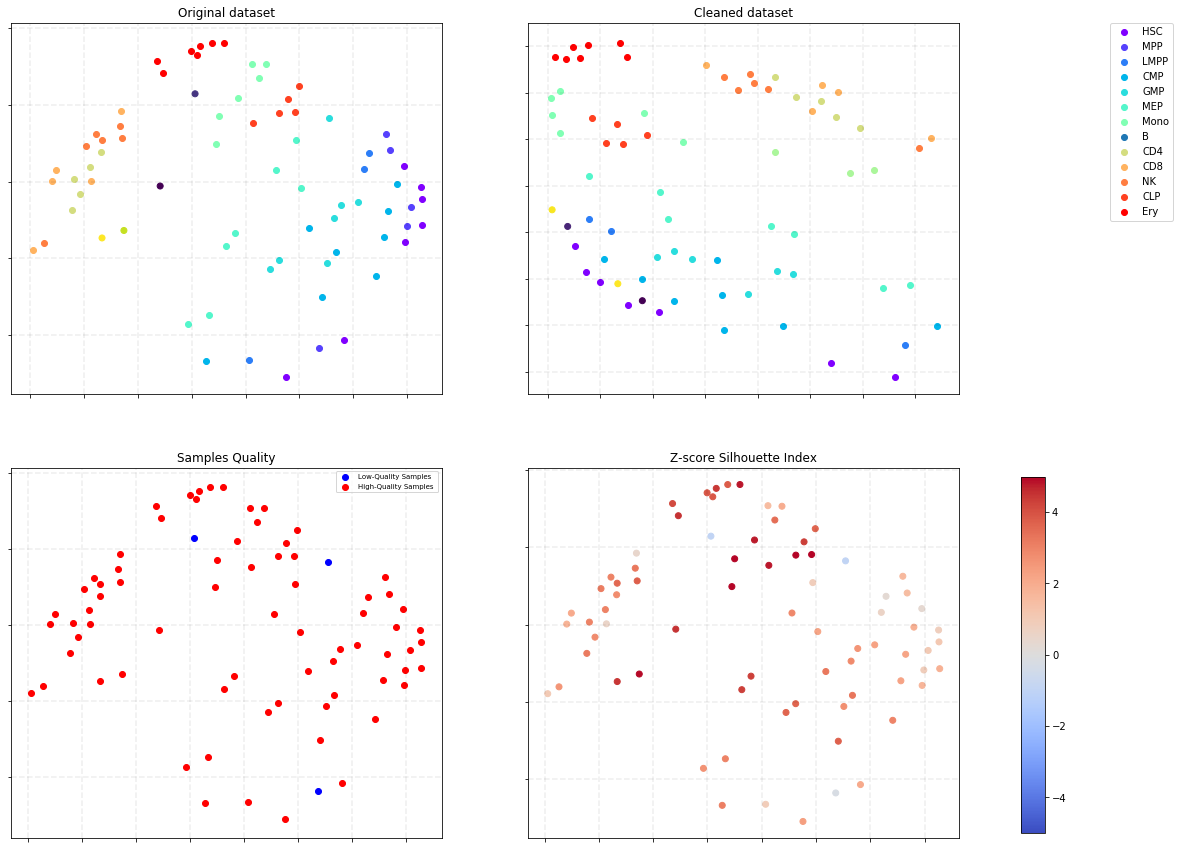

In [138]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,Distance='Euclidean')
qt.display_samples_quality(Suffix='_ATACBinary_RMBAD_Euclidean_MDS',DR='MDS',names=namesCT)

Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 77
# Dataset Kept: 75 (97.4 %)
# Dataset Removed: 2 (2.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.26841621098		Cluster 0
1		5		1.55153110481		Cluster 1
2		3		4.15827170975		Cluster 2
3		8		3.17904674234		Cluster 3
4		7		1.85363505082		Cluster 4
5		7		3.94628648483		Cluster 5
6		6		5.35462079272		Cluster 6
7		4		5.44175130009		Cluster 7
8		5		3.10860891292		Cluster 8
9		5		2.50933271724		Cluster 9
10		6		4.37554333619		Cluster 10
11		5		6.74621362246		Cluster 11
12		7		5.57979455937		Cluster 12



learning rates: 100%|██████████| 3/3 [00:50<00:00, 16.79s/it]


Optimal (learning rate,perplexity) = (100,5)


learning rates: 100%|██████████| 3/3 [00:50<00:00, 16.73s/it]


Optimal (learning rate,perplexity) = (100,5)


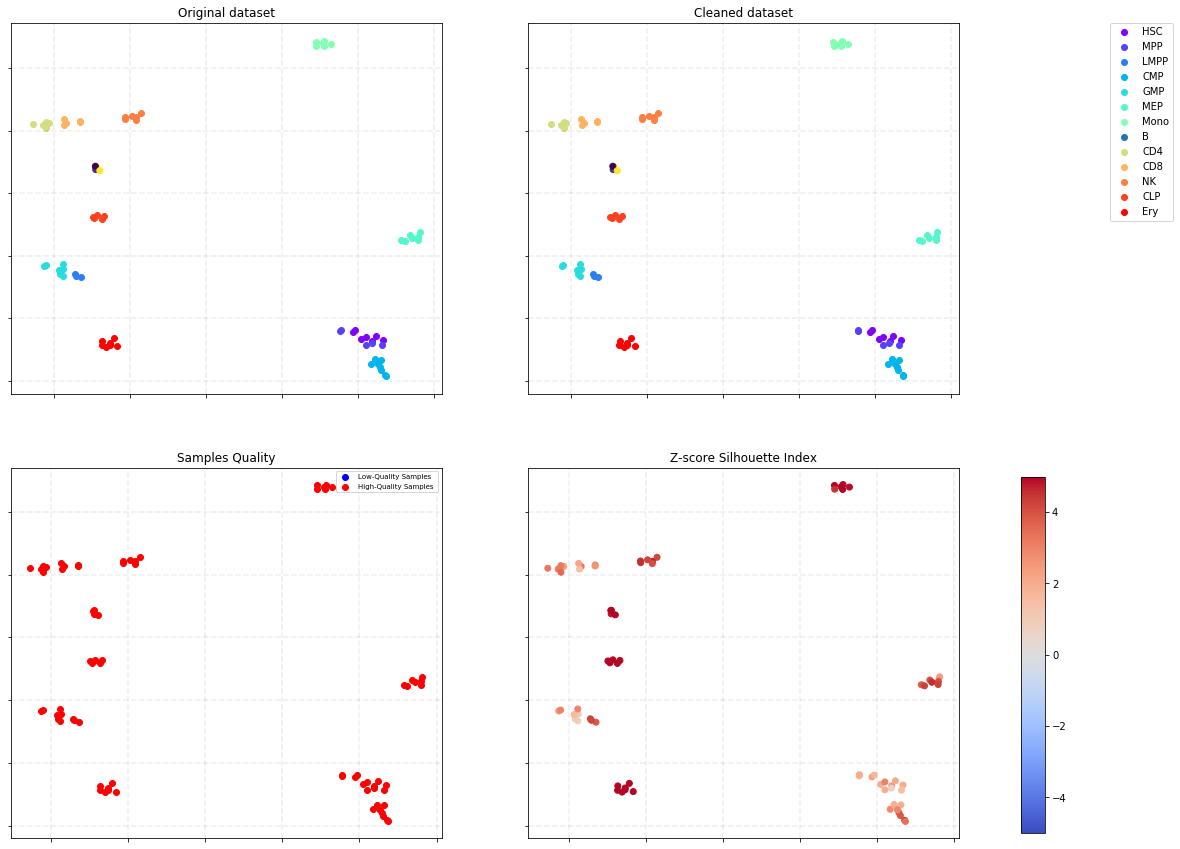

In [150]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,Distance='Yule')
qt.display_samples_quality(Suffix='_ATACBinary_RMBAD_Yule_TSNE',DR='TSNE',names=namesCT)

Using Optimal (PCA,Distance,Kernel) = ('PCA', 'Pearson', 'None')


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 77
# Dataset Kept: 75 (97.4 %)
# Dataset Removed: 2 (2.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.37559615233		Cluster 0
1		5		1.46565659103		Cluster 1
2		3		4.04909528719		Cluster 2
3		8		3.16062862501		Cluster 3
4		7		1.82733521496		Cluster 4
5		7		4.34354971393		Cluster 5
6		6		6.91597005902		Cluster 6
7		4		5.72736608138		Cluster 7
8		5		2.85663062295		Cluster 8
9		5		2.56640129201		Cluster 9
10		6		4.3562785051		Cluster 10
11		5		6.96357525482		Cluster 11
12		7		6.70873318856		Cluster 12



learning rates: 100%|██████████| 3/3 [00:50<00:00, 16.69s/it]


Optimal (learning rate,perplexity) = (100,5)


learning rates: 100%|██████████| 3/3 [00:50<00:00, 16.81s/it]


Optimal (learning rate,perplexity) = (100,5)


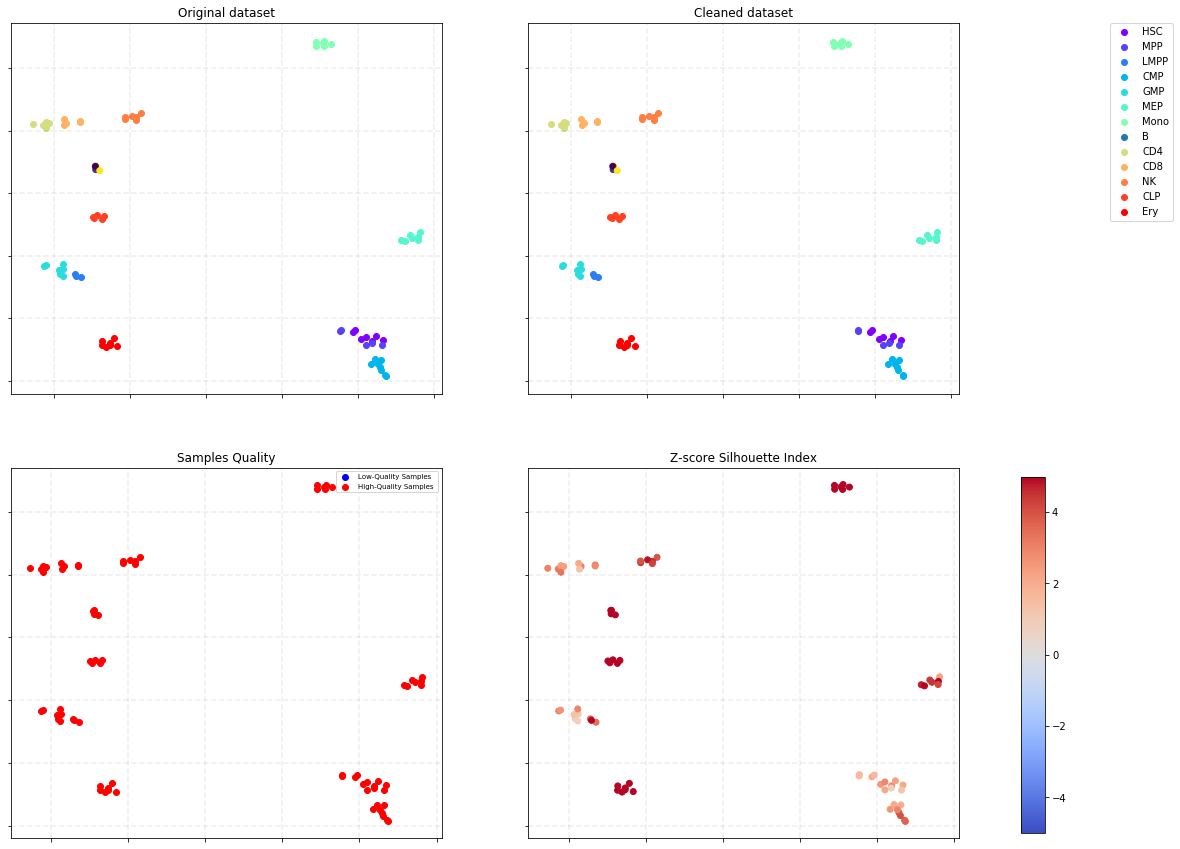

In [148]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False)
qt.display_samples_quality(Suffix='_ATACBinary_PCA-Pearson_TSNE',DR='TSNE',names=namesCT)

Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 77
# Dataset Kept: 74 (96.1 %)
# Dataset Removed: 3 (3.9 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.18629233896		Cluster 0
1		4		1.04935942273		Cluster 1
2		3		1.19404987899		Cluster 2
3		8		2.87107552514		Cluster 3
4		7		2.4848226226		Cluster 4
5		7		2.91494119639		Cluster 5
6		6		6.20649073454		Cluster 6
7		4		3.97384104698		Cluster 7
8		5		3.09567130435		Cluster 8
9		5		1.31067241487		Cluster 9
10		6		3.91723285736		Cluster 10
11		5		7.03634416325		Cluster 11
12		7		6.19969577992		Cluster 12



learning rates: 100%|██████████| 3/3 [00:47<00:00, 15.71s/it]


Optimal (learning rate,perplexity) = (1000,5)


learning rates: 100%|██████████| 3/3 [00:44<00:00, 14.97s/it]


Optimal (learning rate,perplexity) = (10,5)


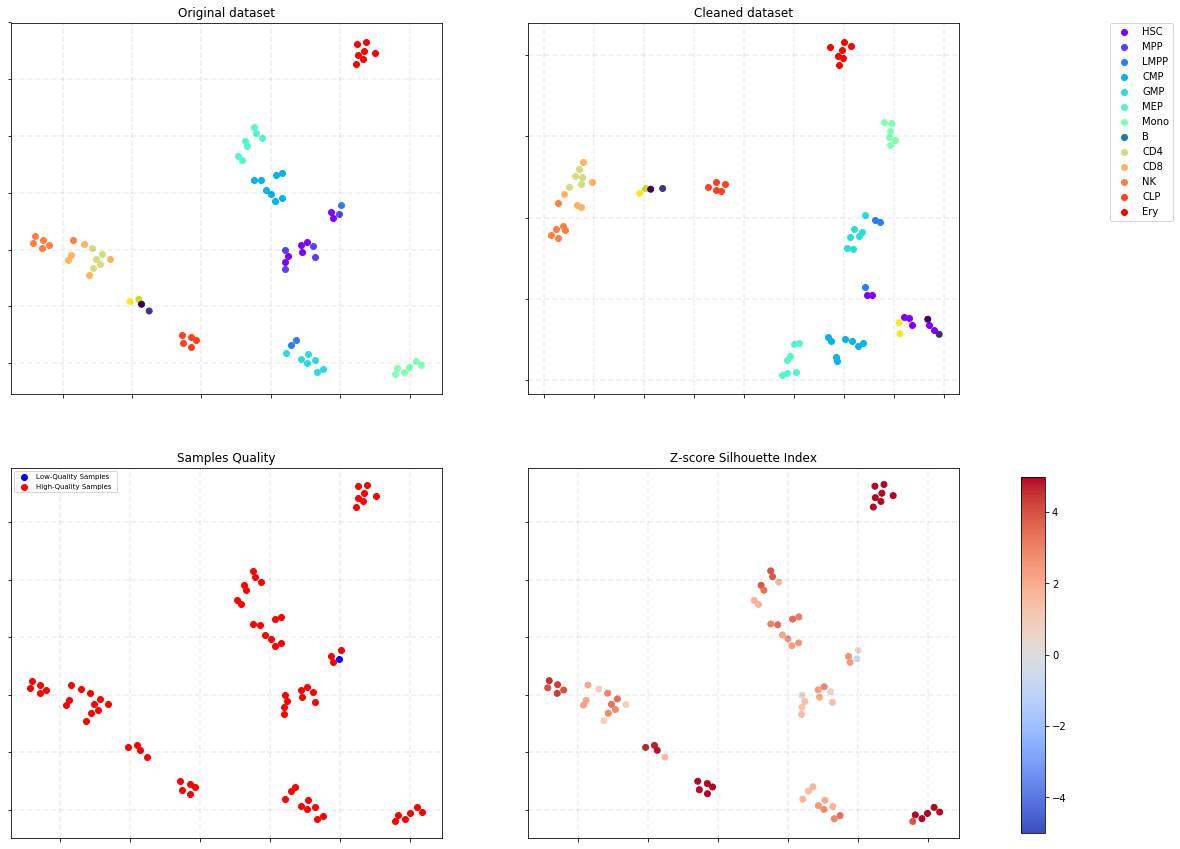

In [149]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,Distance='Jaccard')
qt.display_samples_quality(Suffix='_ATACBinary_Jaccard_TSNE',DR='TSNE',names=namesCT)

# Evolution of the distance measure on clustering indexes 

In [137]:
for key in keys:
    print key,qt.clust_index_filt_threshold['Silhouette'][key]/float(len(qt.labels))*100

PCA-Pearson-None 16.0
PCA-Cosine-None 18.6666666667
PCA-Spearman-None 17.3333333333
PCA-Bray Curtis-None 21.3333333333
None-Yule-None 10.6666666667


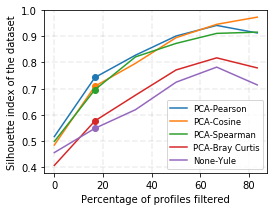

In [180]:
idx = np.argsort(qt.clust_index_filt_score['Silhouette'].values())[::-1]
keys = np.array(qt.clust_index_filt_score['Silhouette'].keys())[idx]
keys = keys[:5]

keys[-1] = 'None-Yule-None'

plt.figure(figsize=(4,3))
N = len(qt.clust_index_filt_evol['Silhouette'][keys[0]])
X = np.arange(N)/float(N)*100

for i,key in enumerate(keys):
    p = plt.plot(X,qt.clust_index_filt_evol['Silhouette'][key],label=key.split('-None')[0])
    
    #Display Silhouette Zscore= 1.65
    X0 = qt.clust_index_filt_threshold['Silhouette'][key]/float(len(qt.labels))*100
    idx0 = np.argmin(np.abs(X-X0))
    plt.plot(X[idx0],qt.clust_index_filt_evol['Silhouette'][key][idx0],'o',c=p[-1].get_color())
    
plt.legend(fontsize='small')
plt.xlabel('Percentage of profiles filtered')
plt.ylabel('Silhouette index of the dataset')
plt.grid(color='k',linestyle='--',linewidth=0.1)
plt.savefig('Silhouette_evolution_with_Filtering_Binary.png',dpi=300, bbox_inches='tight')
plt.show()

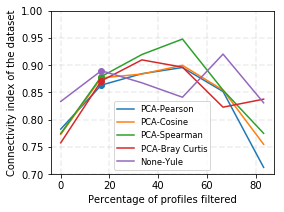

In [181]:
#idx = np.argsort(qt.clust_index_filt_score['Connectivity'].values())[::-1]
#keys = np.array(qt.clust_index_filt_score['Connectivity'].keys())[idx]

plt.figure(figsize=(4,3))
for key in keys[:5]:
    p = plt.plot(X,qt.clust_index_filt_evol['Connectivity'][key],label=key.split('-None')[0])
    
    #Display Silhouette Zscore= 1.65
    X0 = qt.clust_index_filt_threshold['Connectivity'][key]/float(len(qt.labels))*100
    idx0 = np.argmin(np.abs(X-X0))
    plt.plot(X[idx0],qt.clust_index_filt_evol['Connectivity'][key][idx0],'o',c=p[-1].get_color())
    
    
plt.ylim(ymax=1)
plt.legend(fontsize='small')
plt.xlabel('Percentage of profiles filtered')
plt.ylabel('Connectivity index of the dataset')
plt.grid(color='k',linestyle='--',linewidth=0.1)
plt.savefig('Connectivity_evolution_with_Filtering_Binary.png',dpi=300, bbox_inches='tight')
plt.show()

# Table to pandas to Latex

In [473]:
import pandas as pd

In [482]:
table = pd.read_table('Filt_index_ATACBinary.txt')
table

,Distance,Filtered Clustering Index,Number profiles removed at Zscore Silhouette 1.65
0,PCA-Pearson-None,0.906366,12
1,PCA-Spearman-None,0.894134,13
2,PCA-Cosine-None,0.890014,14
3,PCA-Bray Curtis-None,0.842622,13
4,None-Yule-None,0.827427,7
5,PCA-L2-None,0.826332,14
6,PCA-Squared Euclidean-None,0.826004,14
7,PCA-Chebyshev-None,0.822668,15
8,PCA-City Block-None,0.821600,13
9,PCA-Euclidean-None,0.817205,14


In [483]:
table.to_latex(columns=True, col_space=None, header=True, index=True)

u'\\begin{tabular}{llrr}\n\\toprule\n{} &                    Distance &  Filtered Clustering Index &  Number profiles removed at Zscore Silhouette 1.65 \\\\\n\\midrule\n0  &            PCA-Pearson-None &                   0.906366 &                                                 12 \\\\\n1  &           PCA-Spearman-None &                   0.894134 &                                                 13 \\\\\n2  &             PCA-Cosine-None &                   0.890014 &                                                 14 \\\\\n3  &        PCA-Bray Curtis-None &                   0.842622 &                                                 13 \\\\\n4  &              None-Yule-None &                   0.827427 &                                                  7 \\\\\n5  &                 PCA-L2-None &                   0.826332 &                                                 14 \\\\\n6  &  PCA-Squared Euclidean-None &                   0.826004 &                                          

In [15]:
IdxGoodSamplesO,SilZO,OptimalDistanceO = qt.compute_samples_quality(NR=100,Tz=1.65,return_Quality=True)

Error: Need to enter a PCA-Distance-Kernel or launch all measures with compute_distances()


ValueError: 

In [33]:
import QualityMesures as QM
reload(QM)
_,CZ = QM.ZscoreConnectivityQuality(OptDistMat=qt.OptimalDistance,labels=qt.labels,NR=100,Tz=1.65)

In [142]:
reload(QT)

<module 'QualityTester' from '../QualityTester.pyc'>

In [63]:
qt.SilZ[idxS]

array([-30.20318243, -24.02159   , -22.34891912, ...,  37.68716795,
        37.76766758,  38.72301108])

In [69]:
X=[]
Y=[]
M=[]
idxS = np.argsort(qt.SilZ)
for i in tqdm(range(len(idxS)//10)):
    idx = idxS[i*10:]
    distmatC = qt.OptimalDistance[np.ix_(idx,idx)]
    labelsC = qt.labels[idx]
    labels_tmp = labelsC.copy()
    for k,l in enumerate(np.unique(qt.labels)):
        labels_tmp[labelsC==l] = k
    labelsC = labels_tmp
    
    X.append(QT.silhouette_score(distmatC,labelsC))
    Y.append(QT.Connectivity(distmatC,labelsC))
    M.append(qt.SilZ[idxS[i*10]])

 89%|████████▉ | 195/219 [00:41<00:05,  4.69it/s]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

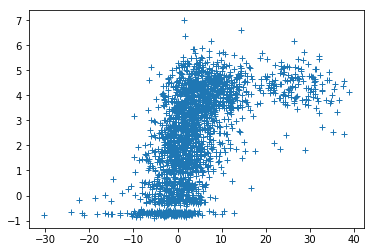

In [34]:
plt.plot(qt.SilZ,CZ,'+')
plt.show()

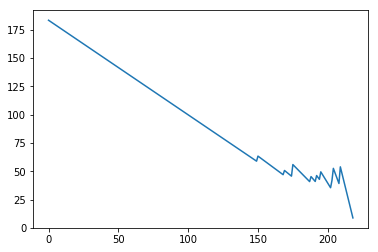

In [80]:
plt.plot(range(len(idxS)//10),M)
plt.show()

In [144]:
fT(M[i])

0.090297588757909206

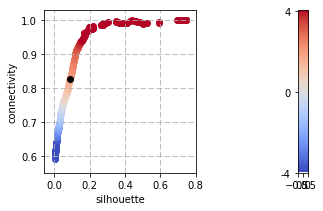

In [157]:
from matplotlib.pyplot import cm

T=1.65

def fT(k):
    if k>4:
        return 4
    elif k<-4:
        return -4
    else:
        return k
        

f,ax = plt.subplots(1,2,figsize=(6,3))
color=cm.coolwarm(np.linspace(0,1,101))
Mmin = -4
Mmax = 8
for i in range(len(X)-4):
    ax[0].scatter(X[i],Y[i],c=color[int((float(fT(M[i])-Mmin)/Mmax)*100)])
    if fT(M[i])>T and fT(M[i-1])<T:
        i0=i
        
#Set in black the position of the threshold
ax[0].scatter(X[i0],Y[i0],c='k')

ax[0].set_xlabel('silhouette')
ax[0].set_ylabel('connectivity')
ax[0].grid('k',linestyle='--')

ax[1].imshow(np.arange(100)[::-1,None],aspect=0.15,cmap='coolwarm')
ax[1].set_yticks(np.arange(0,101,50))
ax[1].set_yticklabels([4,0,-4])

plt.savefig('Clustering_index_evolution_with_SilZscore.png',dpi=300)
plt.show()

1248


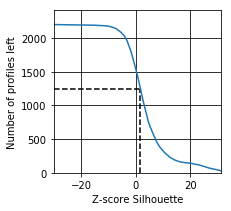

In [140]:
y0 = len(idxS)-np.arange(0,len(idxS),10)[i0]
print y0
plt.figure(figsize=(3,3))
plt.plot(M,len(idxS)-np.arange(0,len(idxS)-20,10))
plt.vlines(x=1.65,ymin=0,ymax=y0,linestyles='--')
plt.hlines(y=y0,xmin=min(M),xmax=1.65,linestyles='--')
plt.xlim([min(M),max(M)])
plt.ylim([0,len(idxS)*1.1])
plt.grid(color='k',linestyle='-')
plt.xlabel('Z-score Silhouette')
plt.ylabel('Number of profiles left')
plt.savefig('Number_of_profiles_with_SilZscore.png',dpi=300)
plt.show()

## Evolution of clustering index with number f profiles

In [290]:
def SilhouetteTruncEvolution(qt,distance,pca):
    X=[]
    Y=[]
    M=[]
    
    #Compute Silhouette Zscore
    try:
        qt.compute_samples_quality(NR=100,Tz=0,return_Quality=False,Distance=distance,PCA=pca)
    except:
        return np.ones(2)*np.nan,np.ones(2)*np.nan,np.ones(2)*np.nan
    
    idxS = np.argsort(qt.SilZ)
    for i in tqdm(range(len(idxS)//10-1)):
        idx = idxS[i*10:]
        distmatC = qt.OptimalDistance[np.ix_(idx,idx)]
        labelsC = qt.labels[idx]
        
        labels_tmp = labelsC.copy()
        for k,l in enumerate(np.unique(labelsC)):
            labels_tmp[labelsC==l] = k
        labelsC = labels_tmp

        X.append(QT.silhouette_score(distmatC,labelsC))
        Y.append(QT.Connectivity(distmatC,labelsC))
        M.append(qt.SilZ[idxS[i*10]])
    
    return np.array(X),np.array(Y),np.array(M)

def qualitysilhouettescore(X):
    return (X+1).sum()/(2.*len(X))

In [254]:
_,silz_y,_ = qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=True,Distance='Yule')
_,silz_j,_ = qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=True,Distance='Jaccard')
_,silz_sp,_ = qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=True,Distance='Spearman',PCA='PCA')

Computing Distance matrix

# Dataset Total: 77
# Dataset Kept: 75 (97.4 %)
# Dataset Removed: 2 (2.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.46749351662		Cluster 0
1		5		1.50005917427		Cluster 1
2		3		4.28455481098		Cluster 2
3		8		3.22451563333		Cluster 3
4		7		1.75168752922		Cluster 4
5		7		4.35494656857		Cluster 5
6		6		6.22185502377		Cluster 6
7		4		5.68500228216		Cluster 7
8		5		3.12281874121		Cluster 8
9		5		2.55678690011		Cluster 9
10		6		4.84262187594		Cluster 10
11		5		5.43821243204		Cluster 11
12		7		5.99372054049		Cluster 12
Computing Distance matrix

# Dataset Total: 77
# Dataset Kept: 74 (96.1 %)
# Dataset Removed: 3 (3.9 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.04854643588		Cluster 0
1		4		0.922039877816		Cluster 1
2		3		1.0955501597		Cluster 2
3		8		3.28937762671		Cluster 3
4		7		2.22848229401		Cluster 4
5		7		2.7860219364		Cluster 5
6		6		6.78421483891		Cluster 6
7		4		3.46175487665		Cluster 7
8		5		2.95208762

In [303]:
SilTruncEvol,SilScore = qt.qualitysilhouettescore()

NameError: global name 'QM' is not defined

In [291]:
X={dist:SilhouetteTruncEvolution(qt=qt,distance=dist,pca=pca)[0] for dist,pca in [('Yule','None'),('Euclidean','None'),('Chebyshev','None'),('Jaccard','None'),('Spearman','PCA')]}

Computing Distance matrix



100%|██████████| 6/6 [00:00<00:00, 233.54it/s]


# Dataset Total: 77
# Dataset Kept: 75 (97.4 %)
# Dataset Removed: 2 (2.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.13304222754		Cluster 0
1		5		1.39197381746		Cluster 1
2		3		4.03226344394		Cluster 2
3		8		2.78697210892		Cluster 3
4		7		2.07517436502		Cluster 4
5		7		4.50750745054		Cluster 5
6		6		5.76955984477		Cluster 6
7		4		5.75989335022		Cluster 7
8		5		2.94249816845		Cluster 8
9		5		2.4586128483		Cluster 9
10		6		4.48675090064		Cluster 10
11		5		6.42701652285		Cluster 11
12		7		5.72652973289		Cluster 12
Computing Distance matrix



100%|██████████| 6/6 [00:00<00:00, 233.24it/s]


# Dataset Total: 77
# Dataset Kept: 72 (93.5 %)
# Dataset Removed: 5 (6.5 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		1.54654603099		Cluster 0
1		4		1.38000003177		Cluster 1
2		3		0.433680004832		Cluster 2
3		8		2.98747759581		Cluster 3
4		6		2.73674673555		Cluster 4
5		7		3.47219190942		Cluster 5
6		6		3.7055884805		Cluster 6
7		3		4.30020105643		Cluster 7
8		5		3.0126075644		Cluster 8
9		5		1.16873219316		Cluster 9
10		6		3.18921609386		Cluster 10
11		5		4.65457526784		Cluster 11
12		7		5.31715500563		Cluster 12
Computing Distance matrix
Computing Distance matrix



100%|██████████| 6/6 [00:00<00:00, 255.90it/s]


# Dataset Total: 77
# Dataset Kept: 74 (96.1 %)
# Dataset Removed: 3 (3.9 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.00226122176		Cluster 0
1		4		1.02354372287		Cluster 1
2		3		1.05403780422		Cluster 2
3		8		2.99914206399		Cluster 3
4		7		2.42046372816		Cluster 4
5		7		2.89334744982		Cluster 5
6		6		6.36367729268		Cluster 6
7		4		4.00177125478		Cluster 7
8		5		3.07983387225		Cluster 8
9		5		1.44611734978		Cluster 9
10		6		4.22271129662		Cluster 10
11		5		6.74504804621		Cluster 11
12		7		5.17289863364		Cluster 12
Computing Distance matrix



100%|██████████| 6/6 [00:00<00:00, 239.06it/s]


# Dataset Total: 77
# Dataset Kept: 67 (87.0 %)
# Dataset Removed: 10 (13.0 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.68788311472		Cluster 0
1		3		1.5140718345		Cluster 1
2		2		0.59751313296		Cluster 2
3		8		5.77005280516		Cluster 3
4		6		2.22734025987		Cluster 4
5		7		4.87977372554		Cluster 5
6		6		6.97113623197		Cluster 6
7		4		5.48272633277		Cluster 7
8		5		5.85366616061		Cluster 8
9		1		2.83052366335		Cluster 9
10		6		6.53154544093		Cluster 10
11		5		6.43316024561		Cluster 11
12		7		6.94365269408		Cluster 12


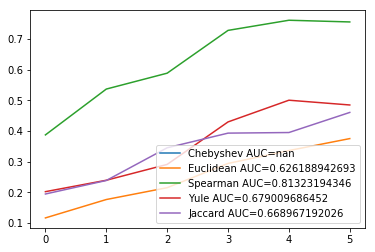

In [292]:
for key in X.keys():
    plt.plot(X[key],label=key+' AUC='+str(qualitysilhouettescore(X[key])))
plt.legend(loc='lower right')
plt.show()

# Visualization

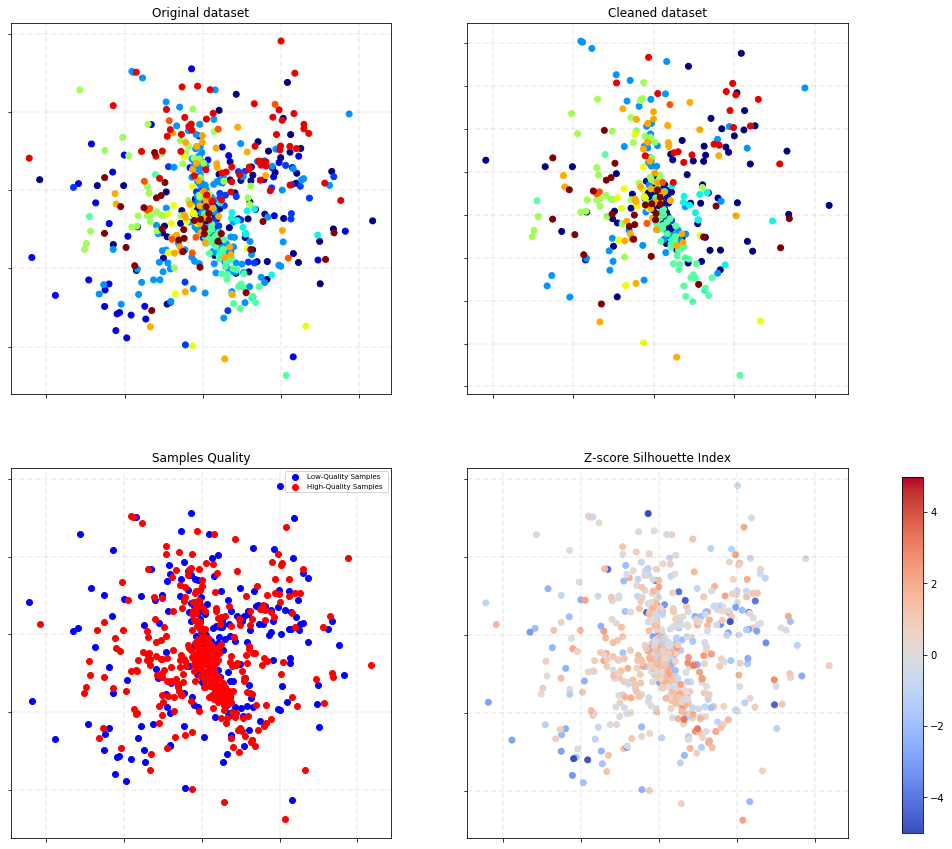

In [104]:
#Reduction Dimension
from sklearn import manifold
from matplotlib.pyplot import cm 

model_tsne = manifold.TSNE(n_components=2, random_state=3,perplexity=500, 
     early_exaggeration=4.0, learning_rate=10, 
     n_iter=100000, metric='precomputed')
# model_tsne = manifold.TSNE(n_components=2, metric='precomputed')
#model_MDS = manifold.MDS(n_components=2, dissimilarity='precomputed')

XY = model_tsne.fit_transform(qt.OptDistMat)

labelsGood = np.zeros(len(labels))
labelsGood[qt.IdxGoodSamples] = 1

f,ax = plt.subplots(2,2,figsize=(15,15))
ax[0,0].scatter(XY[:,0],XY[:,1],c=qt.labels,cmap='jet')
ax[0,0].set_title('Original dataset')
ax[0,0].grid(color='k',linestyle='--',linewidth=0.1)
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])

ax[0,1].scatter(XY[qt.IdxGoodSamples,0],XY[qt.IdxGoodSamples,1],c=labels[qt.IdxGoodSamples],cmap='jet')
ax[0,1].set_title('Cleaned dataset')
ax[0,1].grid(color='k',linestyle='--',linewidth=0.1)
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])

color=cm.bwr(np.linspace(0,1,2))
for i in range(2):
    ax[1,0].scatter(XY[labelsGood==i,0],XY[labelsGood==i,1],c=color[i])

ax[1,0].grid(color='k',linestyle='--',linewidth=0.1)
ax[1,0].legend(['Low-Quality Samples','High-Quality Samples '],loc=0,fontsize='x-small')
ax[1,0].set_title('Samples Quality')
ax[1,0].set_xticklabels([])
ax[1,0].set_yticklabels([])

cax = ax[1,1].scatter(XY[:,0],XY[:,1],c=qt.SilZ, vmin=-5, vmax=5,cmap='coolwarm')
ax[1,1].grid(color='k',linestyle='--',linewidth=0.1)
ax[1,1].set_title('Z-score Silhouette Index')
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

colorbar_ax = f.add_axes([0.95, 0.13, 0.02, 0.33])
f.colorbar(cax, cax=colorbar_ax)

plt.savefig('TSNE-SamplesQuality_scATAC.png',dpi=300,format='png')
plt.show()

# Testing PCA to find optimal genomic sites

In [106]:
sys.path.append('../')
import RandomNGS as RNGS

from tqdm import tqdm 
from sklearn.decomposition import PCA

In [107]:
reload(RNGS)

<module 'RandomNGS' from '../RandomNGS.py'>

In [111]:
M,N = matrix.shape
pca = PCA(n_components=M-1)
pca.fit(matrix)


PCA(copy=True, iterated_power='auto', n_components=541, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [112]:
SV = pca.singular_values_

In [113]:
#Random matrix
pcaR = PCA(n_components=pca.n_components)
NR = 10
SVR = np.zeros((NR,pcaR.n_components))
for nr in tqdm(range(NR)):
    matrixR = RNGS.RandomNGS(matrix,binary=True,seed=nr)
    pcaR.fit(matrixR)
    SVR[nr,:] = pcaR.singular_values_



  0%|          | 0/10 [00:00<?, ?it/s]
Exception in thread Thread-8:
Traceback (most recent call last):
  File "/users/invites/jmorlot/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/users/invites/jmorlot/anaconda2/lib/python2.7/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/users/invites/jmorlot/anaconda2/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



Remaining Index to pick = 949744.0
Remaining Index to pick = 9437.0




 10%|█         | 1/10 [01:13<11:03, 73.72s/it]

Remaining Index to pick = 950095.0
Remaining Index to pick = 9466.0
Remaining Index to pick = 3.0




 20%|██        | 2/10 [02:37<10:31, 78.97s/it]

Remaining Index to pick = 950230.0
Remaining Index to pick = 9318.0




 30%|███       | 3/10 [03:51<09:00, 77.27s/it]

Remaining Index to pick = 948509.0
Remaining Index to pick = 9316.0




 40%|████      | 4/10 [05:05<07:38, 76.42s/it]

Remaining Index to pick = 948229.0
Remaining Index to pick = 9514.0




 50%|█████     | 5/10 [06:19<06:19, 75.91s/it]

Remaining Index to pick = 947966.0
Remaining Index to pick = 9465.0




 60%|██████    | 6/10 [07:33<05:02, 75.55s/it]

Remaining Index to pick = 949156.0
Remaining Index to pick = 9326.0




 70%|███████   | 7/10 [08:48<03:46, 75.44s/it]

Remaining Index to pick = 949533.0
Remaining Index to pick = 9432.0
Remaining Index to pick = 2.0




 80%|████████  | 8/10 [10:13<02:33, 76.66s/it]

Remaining Index to pick = 948784.0
Remaining Index to pick = 9409.0




 90%|█████████ | 9/10 [11:27<01:16, 76.43s/it]

Remaining Index to pick = 950355.0
Remaining Index to pick = 9420.0




100%|██████████| 10/10 [12:42<00:00, 76.26s/it]



In [54]:
pca.components_.shape

(2, 488736)

In [115]:
plt.hist(SV)
plt.hist(SVR)
plt.show()

/users/invites/jmorlot/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 10 x 541)
  '(shape is %d x %d)' % inp.shape[::-1])


KeyboardInterrupt: 

In [119]:
m = SVR.mean(axis=0)
s = SVR.std(axis=0)
S = SV.copy()
S[s==0]=0
s[s==0]=1
NCompOpt = np.max(np.where((S-m)/s>2.32)[0])

In [120]:
pca = PCA(n_components=NCompOpt)
matrixPCA = pca.fit_transform(matrix)

# Comparing with PCA Reduction

In [ ]:
reload(QT)
qtPCA = QT.QualityTester(Binary=True,displaytop=10,PCARed=True)

In [ ]:
qtPCA.compute_distances(matrix,labels,GetDR=False)

In [ ]:
from adjustText import adjust_text
fig, ax = plt.subplots(1,1,figsize=(5,5))
IkeyX = 'Silhouette'
IkeyY = 'Connectivity'

keys=[]
keysPCA=[]
for Ikey in [IkeyX,IkeyY]:
    values = np.array(qt.Res[Ikey].values())
    keysI = np.array(qt.Res[Ikey].keys())
    idx = np.argsort(values)
    idx = idx[~np.isnan(values[idx])]

    if Ikey=='Connectivity': idx = idx[::-1]

    idx = idx[-6:]
    keys = keys + list(keysI[idx])
    
    #PCA
    values = np.array(qtPCA.Res[Ikey].values())
    keysI = np.array(qtPCA.Res[Ikey].keys())
    idx = np.argsort(values)
    idx = idx[~np.isnan(values[idx])]

    if Ikey=='Connectivity': idx = idx[::-1]

    idx = idx[-6:]
    keysPCA = keysPCA + list(keysI[idx])
    
    

keys = list(set(keys))
keysPCA = list(set(keysPCA))

X = np.array([qt.Res[IkeyX][key] for key in keys]) 
XPCA = np.array([qtPCA.Res[IkeyX][key] for key in keysPCA])

Y = np.array([qt.Res[IkeyY][key] for key in keys])
YPCA = np.array([qtPCA.Res[IkeyY][key] for key in keysPCA])

ax.plot(X,Y,'ob')
ax.plot(XPCA,YPCA,'or')

texts = [ax.text(qt.Res[IkeyX][key], qt.Res[IkeyY][key], key.replace(' / ','\n')) for key in keys] + \
        [ax.text(qtPCA.Res[IkeyX][key], qtPCA.Res[IkeyY][key], key.replace(' / ','\n')) for key in keysPCA]

    
# xmin = min([X.min(),XPCA.min()])
# xmax = max([X.max(),XPCA.max()])
# ymin = min([Y.min(),YPCA.min()])
# ymax = max([Y.max(),YPCA.max()])

# xmin = xmin*1.4
# xmax = xmax*1.4
# ymin = ymin*1.4
# ymax = ymax*1.4

# ax.set_xlim([xmin,xmax])
# ax.set_ylim([ymin,ymax])
    
adjust_text(texts)

ax.grid(color='k',linestyle='--',linewidth=0.1)
ax.set_xlabel(IkeyX)
ax.set_ylabel(IkeyY)

plt.savefig('NamesScatter_scell_withPCARed.png',dpi=300,format='png')

plt.show()

In [233]:
values = np.array(qtPCA.Res['Silhouette'].values())
keys = np.array(qtPCA.Res['Silhouette'].keys())
idx = np.argsort(values)[::-1]
for k,v in zip(keys[idx],values[idx]):
    print k,v

Spearman / ExpKernel 0.0566900846652
Spearman / None 0.0555179522158
braycurtis / ExpKernel 0.0389649722636
braycurtis / None 0.0380474975261
cosine / ExpKernel 0.0328915665996
cosine / None 0.0318756545068
correlation / ExpKernel 0.0314446894129
correlation / None 0.0304435138352
MIC / ExpKernel 0.0200322490168
MIC / None 0.0194210632247
canberra / None 0.0181110416817
seuclidean / ExpKernel 0.00274829820394
chebyshev / ExpKernel 5.52454207842e-12
canberra / ExpKernel 0.0
None / ExpKernel 0.0
euclidean / ExpKernel 0.0
l2 / ExpKernel 0.0
cityblock / ExpKernel 0.0
hamming / None 0.0
hamming / ExpKernel -1.04117767932e-15
None / CosKernel -0.0220828440358
hamming / CosKernel -0.0221401506558
braycurtis / CosKernel -0.0221569840452
Spearman / CosKernel -0.0221626512138
canberra / CosKernel -0.0221628559194
MIC / CosKernel -0.0221754429782
correlation / CosKernel -0.022190207611
cosine / CosKernel -0.0221911069306
cityblock / SigKernel -0.0221913726589
canberra / SigKernel -0.0223114103991